In [1]:
import pickle
import numpy as np
import pandas as pd
import os
from copy import deepcopy
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import pypolo2

In [2]:
# 42 #1 44 
# 2 新的源分布且deltaT变为0.3
strategy_name = ["forestfire_Nonmyopic_Adaptive_Sensing_Operation",
                 "forestfire_Nonmyopic_Adaptive_Operation",
                 "forestfire_Without_Operation"]
comparing_variables = ["releaserate_010","releaserate_020","releaserate_040"]
starttime = '2018-11-23 08:00:00'
seed = 0
starttime = starttime.replace(' ', '-').replace(':', '-')
pklname = 'seed{}_starttime{}'.format(seed, starttime)

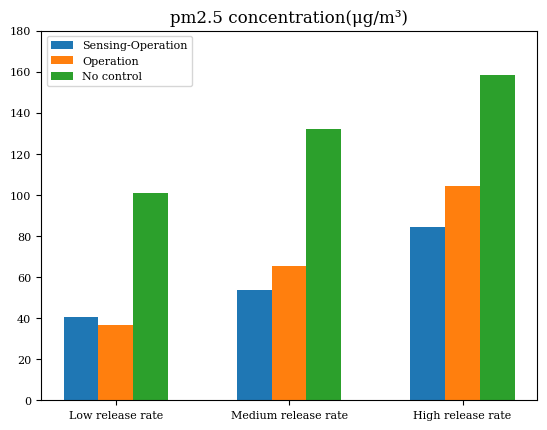

In [3]:
select_time = 60
mean_airpollution = []
for comparing_variable in comparing_variables:
    list = []
    for stategy in strategy_name:
        pkldir = './outputs/' + stategy + '/' + comparing_variable + '/' + pklname + ".pkl"
        data = pypolo2.experiments.utilities.readpkl(pkldir)
        list.append(data['mean_airpollution'][select_time-1])
    mean_airpollution.append(list)
mean_airpollution = np.array(mean_airpollution)

# plot
labels = ['Low release rate', 'Medium release rate', 'High release rate']
data_labels = ['Sensing-Operation', 'Operation', 'No control']
x_ticks = np.arange(len(labels))
plt.bar(x_ticks - 0.2, mean_airpollution[:, 0], width=0.2, align='center', label=data_labels[0])
plt.bar(x_ticks, mean_airpollution[:, 1], width=0.2, align='center', label=data_labels[1])
plt.bar(x_ticks + 0.2, mean_airpollution[:, 2], width=0.2, align='center', label=data_labels[2])
plt.xticks(x_ticks, labels)
plt.ylim(0, 180)
plt.legend()
plt.title('pm2.5 concentration(μg/m³)')
plt.show()

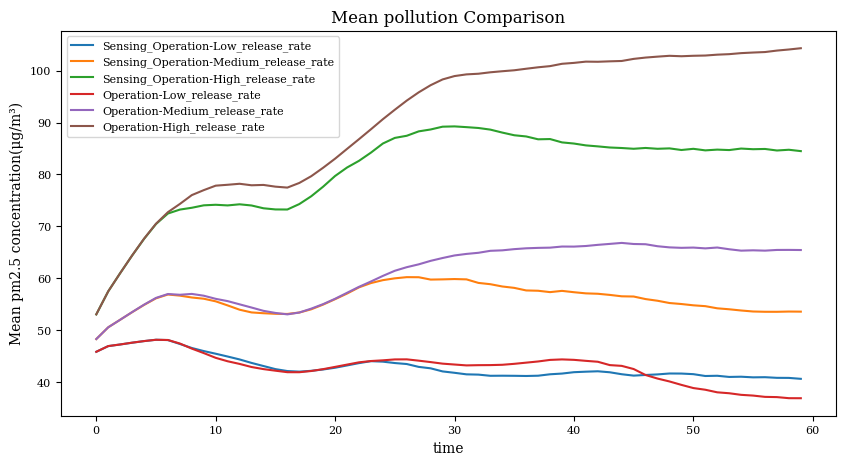

In [4]:
mean_airpollution = []
for comparing_variable in comparing_variables:
    list = []
    for stategy in strategy_name:
        pkldir = './outputs/' + stategy + '/' + comparing_variable + '/' + pklname + ".pkl"
        data = pypolo2.experiments.utilities.readpkl(pkldir)
        list.append(np.array(data['mean_airpollution']))
    mean_airpollution.append(list)
# mean_airpollution = np.array(mean_airpollution)

# 创建一个新的Matplotlib图形
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# 绘制平均污染物浓度
ax.plot(mean_airpollution[0][0], label='Sensing_Operation-Low_release_rate')
ax.plot(mean_airpollution[1][0], label='Sensing_Operation-Medium_release_rate')
ax.plot(mean_airpollution[2][0], label='Sensing_Operation-High_release_rate')
ax.plot(mean_airpollution[0][1], label='Operation-Low_release_rate')
ax.plot(mean_airpollution[1][1], label='Operation-Medium_release_rate')
ax.plot(mean_airpollution[2][1], label='Operation-High_release_rate')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('Mean pm2.5 concentration(μg/m³)')
ax.set_title('Mean pollution Comparison')
plt.show()